In [1]:
from fastai.vision import *
from fastai.vision.gan import *
from fastai.vision.all import *
from fastai.callback.all import *

In [2]:
#load smaller version of MNIST
path = untar_data(URLs.MNIST_TINY)
path.ls()

(#5) [Path('C:/Users/Aren/.fastai/data/mnist_tiny/labels.csv'),Path('C:/Users/Aren/.fastai/data/mnist_tiny/models'),Path('C:/Users/Aren/.fastai/data/mnist_tiny/test'),Path('C:/Users/Aren/.fastai/data/mnist_tiny/train'),Path('C:/Users/Aren/.fastai/data/mnist_tiny/valid')]

In [3]:
#batch size and resolution
bs = 128
size = 32

In [4]:
#create datablock
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   item_tfms=Resize(size, method=ResizeMethod.Crop))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


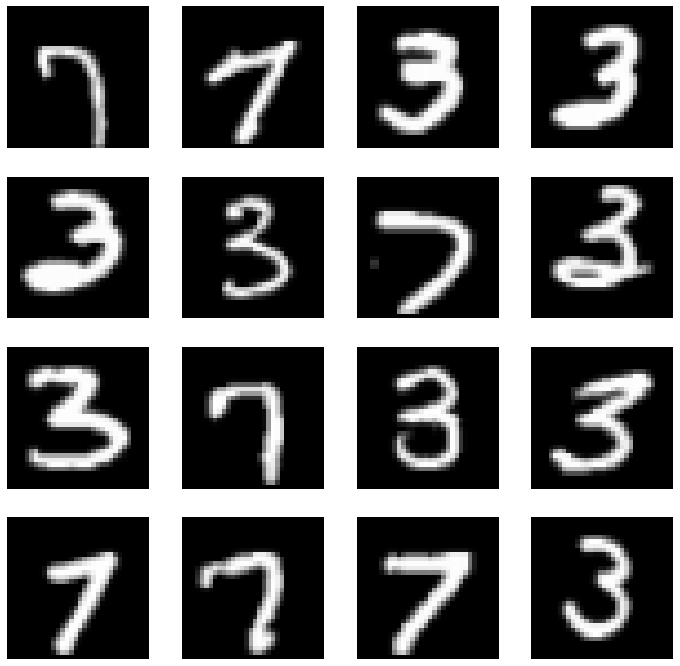

In [5]:
#load the data and show the batch
dls = dblock.dataloaders(path, path=path, bs=bs)
dls.show_batch(max_n=16)

In [51]:
#generator generates the new image
#critics classifies the images as fake or real 0 or 1
generator = basic_generator(size, n_channels=3, n_extra_layers=1) 
critic    = basic_critic   (size, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.1))

#train wgan with dls, generator, critic 
learn = GANLearner.wgan(dls, generator, critic,opt_func = partial(Adam, mom=0.))

#show only train metrics
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [52]:
#train
learn.fit(100,2e-3)

epoch,train_loss,gen_loss,crit_loss,time
0,-0.128536,0.086710,-0.152837,00:02
1,-0.169438,0.246941,-0.316183,00:02
2,-0.238910,0.301825,-0.482625,00:02
3,-0.262208,0.241343,-0.441498,00:02
4,-0.237489,0.199057,-0.284292,00:02
5,-0.215493,0.113132,-0.201296,00:02
6,-0.212681,0.224286,-0.285636,00:02
7,-0.199860,0.209518,-0.265266,00:02
8,-0.192526,0.084798,-0.221863,00:02
9,-0.173967,-0.029238,-0.166080,00:02


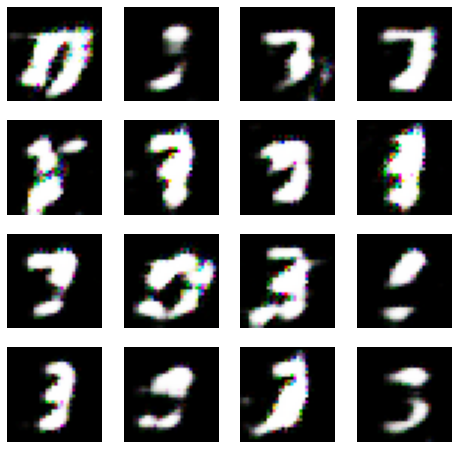

In [53]:
#show results
learn.show_results(max_n=16, figsize=(8,8), ds_idx=0)